# 1.Enviroment Setup

In [ ]:
from google.colab import drive 
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
%cd /content/drive/MyDrive/IDS561 Group7/Project

/content/drive/MyDrive/IDS561 Group7/Project


In [ ]:
!apt-get install openjdk-8-jdk-headless -qq > /dev/null

In [ ]:
# Download Spark
!wget -v https://dlcdn.apache.org/spark/spark-3.3.2/spark-3.3.2-bin-hadoop3.tgz

--2023-04-25 03:02:12--  https://dlcdn.apache.org/spark/spark-3.3.2/spark-3.3.2-bin-hadoop3.tgz
Resolving dlcdn.apache.org (dlcdn.apache.org)... 151.101.2.132, 2a04:4e42::644
Connecting to dlcdn.apache.org (dlcdn.apache.org)|151.101.2.132|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 299360284 (285M) [application/x-gzip]
Saving to: ‘spark-3.3.2-bin-hadoop3.tgz.4’

spark-3.3.2-bin-had 100%[===================>] 285.49M  53.5MB/s    in 5.2s    

2023-04-25 03:02:18 (54.8 MB/s) - ‘spark-3.3.2-bin-hadoop3.tgz.4’ saved [299360284/299360284]



In [ ]:
!ls

'count plot.png'	       spark-3.3.2-bin-hadoop3.tgz.1
 kaggle_bot_accounts.csv       spark-3.3.2-bin-hadoop3.tgz.2
'% plot.png'		       spark-3.3.2-bin-hadoop3.tgz.3
 spark-3.3.2-bin-hadoop3       spark-3.3.2-bin-hadoop3.tgz.4
 spark-3.3.2-bin-hadoop3.tgz


In [ ]:
!tar -xvf spark-3.3.2-bin-hadoop3.tgz

spark-3.3.2-bin-hadoop3/
spark-3.3.2-bin-hadoop3/LICENSE
spark-3.3.2-bin-hadoop3/NOTICE
spark-3.3.2-bin-hadoop3/R/
spark-3.3.2-bin-hadoop3/R/lib/
spark-3.3.2-bin-hadoop3/R/lib/SparkR/
spark-3.3.2-bin-hadoop3/R/lib/SparkR/DESCRIPTION
spark-3.3.2-bin-hadoop3/R/lib/SparkR/INDEX
spark-3.3.2-bin-hadoop3/R/lib/SparkR/Meta/
spark-3.3.2-bin-hadoop3/R/lib/SparkR/Meta/Rd.rds
spark-3.3.2-bin-hadoop3/R/lib/SparkR/Meta/features.rds
spark-3.3.2-bin-hadoop3/R/lib/SparkR/Meta/hsearch.rds
spark-3.3.2-bin-hadoop3/R/lib/SparkR/Meta/links.rds
spark-3.3.2-bin-hadoop3/R/lib/SparkR/Meta/nsInfo.rds
spark-3.3.2-bin-hadoop3/R/lib/SparkR/Meta/package.rds
spark-3.3.2-bin-hadoop3/R/lib/SparkR/Meta/vignette.rds
spark-3.3.2-bin-hadoop3/R/lib/SparkR/NAMESPACE
spark-3.3.2-bin-hadoop3/R/lib/SparkR/R/
spark-3.3.2-bin-hadoop3/R/lib/SparkR/R/SparkR
spark-3.3.2-bin-hadoop3/R/lib/SparkR/R/SparkR.rdb
spark-3.3.2-bin-hadoop3/R/lib/SparkR/R/SparkR.rdx
spark-3.3.2-bin-hadoop3/R/lib/SparkR/doc/
spark-3.3.2-bin-hadoop3/R/lib/Spar

In [ ]:
import os
os.environ["JAVA_HOME"] = "/usr/lib/jvm/java-8-openjdk-amd64"
os.environ["SPARK_HOME"] = '/content/drive/MyDrive/IDS561 Group7/Project/spark-3.3.2-bin-hadoop3'

In [ ]:
# Install library for finding Spark
!pip install -q findspark

In [ ]:
!pip install pyspark[sql]

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 310.8/310.8 MB 1.9 MB/s eta 0:00:00
  Preparing metadata (setup.py) ... done
  Created wheel for pyspark: filename=pyspark-3.4.0-py2.py3-none-any.whl size=311317145 sha256=4d67aae33eace07f13094bbe3fa48b492567f2b9d2e098dd839e106cc42b9b35
  Stored in directory: /root/.cache/pip/wheels/9f/34/a4/159aa12d0a510d5ff7c8f0220abbea42e5d81ecf588c4fd884
Successfully built pyspark


In [ ]:
import findspark
findspark.init('/content/drive/MyDrive/IDS561 Group7/Project/spark-3.3.2-bin-hadoop3')
from pyspark.sql import SparkSession
spark = SparkSession.builder.master("local[*]").getOrCreate()

# 2.Import Dataset

In [ ]:
acc_data = spark.read.options(delimiter=",",header=True).csv("kaggle_bot_accounts.csv")

In [ ]:
acc_data.count()

1321188

Here’s a quick look at the first 20 rows of the dataset

In [ ]:
acc_data.show(n=20)

+---+--------------------+------+--------------------+---------+--------------+---------------+-------------+----------+----------------+--------------------+-----------------+---------------------+-------------------+-------------------+-------------------+-----+
|_c0|                NAME|GENDER|            EMAIL_ID|IS_GLOGIN|FOLLOWER_COUNT|FOLLOWING_COUNT|DATASET_COUNT|CODE_COUNT|DISCUSSION_COUNT|AVG_NB_READ_TIME_MIN|REGISTRATION_IPV4|REGISTRATION_LOCATION|TOTAL_VOTES_GAVE_NB|TOTAL_VOTES_GAVE_DS|TOTAL_VOTES_GAVE_DC|ISBOT|
+---+--------------------+------+--------------------+---------+--------------+---------------+-------------+----------+----------------+--------------------+-----------------+---------------------+-------------------+-------------------+-------------------+-----+
|  0|   Johnny KerrThomas|  Male|jacksonalan@examp...|    False|          53.0|           87.0|          5.0|       3.0|           124.0|                null|     81.88.75.170|            Argentina|       

In [ ]:
# Rename undefined column
acc_data = acc_data.withColumnRenamed("_c0", "INDEX")

# 3.Exploratory Data Analysis - Statistics and Basic Analysis

## Schema

In [ ]:
acc_data.printSchema()

root
 |-- INDEX: string (nullable = true)
 |-- NAME: string (nullable = true)
 |-- GENDER: string (nullable = true)
 |-- EMAIL_ID: string (nullable = true)
 |-- IS_GLOGIN: string (nullable = true)
 |-- FOLLOWER_COUNT: string (nullable = true)
 |-- FOLLOWING_COUNT: string (nullable = true)
 |-- DATASET_COUNT: string (nullable = true)
 |-- CODE_COUNT: string (nullable = true)
 |-- DISCUSSION_COUNT: string (nullable = true)
 |-- AVG_NB_READ_TIME_MIN: string (nullable = true)
 |-- REGISTRATION_IPV4: string (nullable = true)
 |-- REGISTRATION_LOCATION: string (nullable = true)
 |-- TOTAL_VOTES_GAVE_NB: string (nullable = true)
 |-- TOTAL_VOTES_GAVE_DS: string (nullable = true)
 |-- TOTAL_VOTES_GAVE_DC: string (nullable = true)
 |-- ISBOT: string (nullable = true)



## Check for Missing Value

In [ ]:
from pyspark.sql.functions import isnan, when, count, col

acc_data_null = acc_data.select([count(when(isnan(c)|col(c).isNull(),c)).alias(c) for c in acc_data.columns])
acc_data_null.show()

+-----+-----+------+--------+---------+--------------+---------------+-------------+----------+----------------+--------------------+-----------------+---------------------+-------------------+-------------------+-------------------+-----+
|INDEX| NAME|GENDER|EMAIL_ID|IS_GLOGIN|FOLLOWER_COUNT|FOLLOWING_COUNT|DATASET_COUNT|CODE_COUNT|DISCUSSION_COUNT|AVG_NB_READ_TIME_MIN|REGISTRATION_IPV4|REGISTRATION_LOCATION|TOTAL_VOTES_GAVE_NB|TOTAL_VOTES_GAVE_DS|TOTAL_VOTES_GAVE_DC|ISBOT|
+-----+-----+------+--------+---------+--------------+---------------+-------------+----------+----------------+--------------------+-----------------+---------------------+-------------------+-------------------+-------------------+-----+
|    0|78164| 77879|   77814|    77916|         77712|          78445|        78567|     77926|           77722|               78316|            78329|                78290|              77705|              77934|              78030|78500|
+-----+-----+------+--------+---------+-

In [ ]:
from pyspark.sql.functions import lit
amount_missing = acc_data.select([(count(when(isnan(c) | col(c).isNull(), c))/count(lit(1))).alias(c) for c in acc_data.columns])
amount_missing.show()

+-----+-------------------+------------------+--------------------+------------------+-------------------+-------------------+-------------------+-------------------+-------------------+--------------------+-------------------+---------------------+-------------------+-------------------+--------------------+-------------------+
|INDEX|               NAME|            GENDER|            EMAIL_ID|         IS_GLOGIN|     FOLLOWER_COUNT|    FOLLOWING_COUNT|      DATASET_COUNT|         CODE_COUNT|   DISCUSSION_COUNT|AVG_NB_READ_TIME_MIN|  REGISTRATION_IPV4|REGISTRATION_LOCATION|TOTAL_VOTES_GAVE_NB|TOTAL_VOTES_GAVE_DS| TOTAL_VOTES_GAVE_DC|              ISBOT|
+-----+-------------------+------------------+--------------------+------------------+-------------------+-------------------+-------------------+-------------------+-------------------+--------------------+-------------------+---------------------+-------------------+-------------------+--------------------+-------------------+
|  0.0|

In [ ]:
amount_missing_df = amount_missing.toPandas()
amount_missing_df.index = ['portion of missing value']
amount_missing_df = amount_missing_df.transpose()
amount_missing_df

,portion of missing value
INDEX,0.000000
NAME,0.059162
GENDER,0.058946
EMAIL_ID,0.058897
IS_GLOGIN,0.058974
FOLLOWER_COUNT,0.058820
FOLLOWING_COUNT,0.059375
DATASET_COUNT,0.059467
CODE_COUNT,0.058982
DISCUSSION_COUNT,0.058827


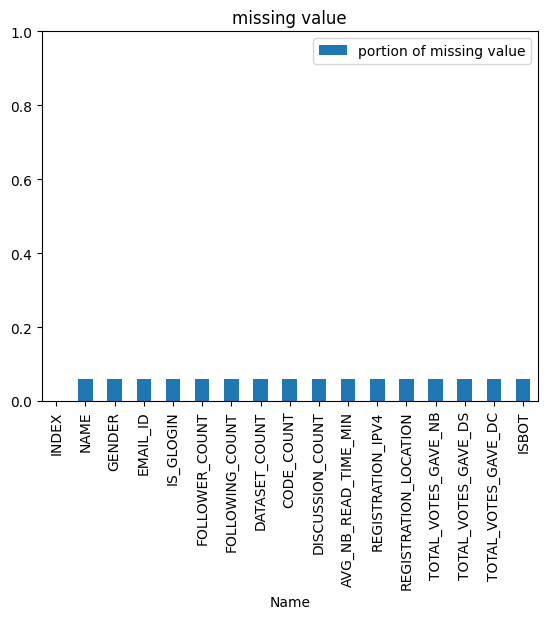

In [ ]:
import seaborn as sns
import matplotlib as mpl
from matplotlib import pyplot as plt

amount_missing_df['Name'] = amount_missing_df.index
amount_missing_df.plot(x='Name', kind='bar', stacked=True,
        title='missing value')
plt.ylim(0,1)
plt.show()

## Analyzing the distrbution of the target variable : ISBOT's class distribution

In [ ]:
from pyspark.sql.window import Window
import pyspark.sql.functions as f

bot_acc = acc_data.groupBy("ISBOT").count()
bot_null = bot_acc.withColumn('percent', f.col('count')/f.sum('count').over(Window.partitionBy()))
bot_null.orderBy('percent', ascending=False).show()


+-----+------+-------------------+
|ISBOT| count|            percent|
+-----+------+-------------------+
|False|909794| 0.6886181224776489|
| True|332894|0.25196565515278674|
| null| 78500|0.05941622236956436|
+-----+------+-------------------+



In [ ]:
isbot_df = bot_null.toPandas()

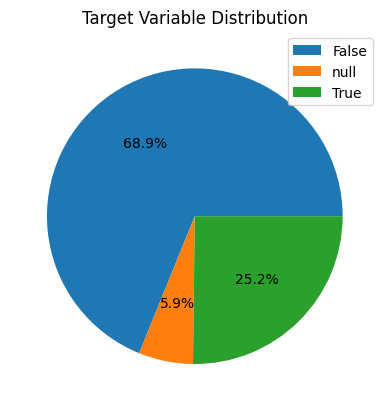

In [ ]:
# Visualizing the target label distribution using a pie chart

labels = ['False','null','True']
plt.title("Target Variable Distribution")
plt.pie(isbot_df['percent'], autopct='%1.1f%%')
plt.legend(labels, loc="upper right")
plt.show()


Around 25.2% of the accounts are bots

## Removing unnecessary features & missing data first

In [ ]:
acc_data = acc_data.drop('INDEX','Name','EMAIL_ID','REGISTRATION_IPV4','REGISTRATION_LOCATION')
acc_data = acc_data.na.drop(how='any')
acc_data.show()

+------+---------+--------------+---------------+-------------+----------+----------------+--------------------+-------------------+-------------------+-------------------+-----+
|GENDER|IS_GLOGIN|FOLLOWER_COUNT|FOLLOWING_COUNT|DATASET_COUNT|CODE_COUNT|DISCUSSION_COUNT|AVG_NB_READ_TIME_MIN|TOTAL_VOTES_GAVE_NB|TOTAL_VOTES_GAVE_DS|TOTAL_VOTES_GAVE_DC|ISBOT|
+------+---------+--------------+---------------+-------------+----------+----------------+--------------------+-------------------+-------------------+-------------------+-----+
|  Male|     True|          44.0|           81.0|          4.0|      17.0|           125.0|                7.75|               16.0|                4.0|                0.0|False|
|  Male|     True|          23.0|          114.0|          5.0|      24.0|            67.0|                13.4|               21.0|               10.0|                1.0|False|
|Female|    False|          46.0|          112.0|          2.0|      12.0|            63.0|              

In [ ]:
acc_data.count()

636780

## Convert data type from string to double type

In [ ]:
acc_data = acc_data.withColumn('FOLLOWER_COUNT',acc_data['FOLLOWER_COUNT'].cast("double").alias('FOLLOWER_COUNT'))
acc_data = acc_data.withColumn('FOLLOWING_COUNT',acc_data['FOLLOWING_COUNT'].cast("double").alias('FOLLOWING_COUNT'))
acc_data = acc_data.withColumn('DATASET_COUNT',acc_data['DATASET_COUNT'].cast("double").alias('DATASET_COUNT'))
acc_data = acc_data.withColumn('CODE_COUNT',acc_data['CODE_COUNT'].cast("double").alias('CODE_COUNT'))
acc_data = acc_data.withColumn('DISCUSSION_COUNT',acc_data['DISCUSSION_COUNT'].cast("double").alias('DISCUSSION_COUNT'))
acc_data = acc_data.withColumn('AVG_NB_READ_TIME_MIN',acc_data['AVG_NB_READ_TIME_MIN'].cast("double").alias('AVG_NB_READ_TIME_MIN'))
acc_data = acc_data.withColumn('TOTAL_VOTES_GAVE_NB',acc_data['TOTAL_VOTES_GAVE_NB'].cast("double").alias('TOTAL_VOTES_GAVE_NB'))
acc_data = acc_data.withColumn('TOTAL_VOTES_GAVE_DS',acc_data['TOTAL_VOTES_GAVE_DS'].cast("double").alias('TOTAL_VOTES_GAVE_DS'))
acc_data = acc_data.withColumn('TOTAL_VOTES_GAVE_DC',acc_data['TOTAL_VOTES_GAVE_DC'].cast("double").alias('TOTAL_VOTES_GAVE_DC'))

In [ ]:
acc_data.printSchema()

root
 |-- GENDER: string (nullable = true)
 |-- IS_GLOGIN: string (nullable = true)
 |-- FOLLOWER_COUNT: double (nullable = true)
 |-- FOLLOWING_COUNT: double (nullable = true)
 |-- DATASET_COUNT: double (nullable = true)
 |-- CODE_COUNT: double (nullable = true)
 |-- DISCUSSION_COUNT: double (nullable = true)
 |-- AVG_NB_READ_TIME_MIN: double (nullable = true)
 |-- TOTAL_VOTES_GAVE_NB: double (nullable = true)
 |-- TOTAL_VOTES_GAVE_DS: double (nullable = true)
 |-- TOTAL_VOTES_GAVE_DC: double (nullable = true)
 |-- ISBOT: string (nullable = true)



## Summary statistics for numeric variables

In [ ]:
from pyspark.sql.types import *

db_col= [column.name for column in acc_data.schema if column.dataType != StringType()]

for col in db_col:
  print('Feature/Attribute: ', col)
  acc_data.select(col).describe().show()
  print('**********************************************************')

Feature/Attribute:  FOLLOWER_COUNT
+-------+------------------+
|summary|    FOLLOWER_COUNT|
+-------+------------------+
|  count|            636780|
|   mean|26.970267596344105|
| stddev|22.993515745810917|
|    min|               0.0|
|    max|              70.0|
+-------+------------------+

**********************************************************
Feature/Attribute:  FOLLOWING_COUNT
+-------+------------------+
|summary|   FOLLOWING_COUNT|
+-------+------------------+
|  count|            636780|
|   mean|45.052061936618614|
| stddev| 39.45132199082988|
|    min|               0.0|
|    max|             120.0|
+-------+------------------+

**********************************************************
Feature/Attribute:  DATASET_COUNT
+-------+------------------+
|summary|     DATASET_COUNT|
+-------+------------------+
|  count|            636780|
|   mean| 2.566300763214925|
| stddev|2.5011106875478597|
|    min|               0.0|
|    max|               7.0|
+-------+------------

## Checking the distribution of numeric variables

In [ ]:
acc_df = acc_data.toPandas()

In [ ]:
numeric_df = acc_df.select_dtypes(exclude=['object'])
numeric_df

,FOLLOWER_COUNT,FOLLOWING_COUNT,DATASET_COUNT,CODE_COUNT,DISCUSSION_COUNT,AVG_NB_READ_TIME_MIN,TOTAL_VOTES_GAVE_NB,TOTAL_VOTES_GAVE_DS,TOTAL_VOTES_GAVE_DC
0,44.0,81.0,4.0,17.0,125.0,7.75,16.0,4.0,0.0
1,23.0,114.0,5.0,24.0,67.0,13.40,21.0,10.0,1.0
2,46.0,112.0,2.0,12.0,63.0,24.83,10.0,6.0,2.0
3,2.0,2.0,0.0,0.0,0.0,0.62,18.0,9.0,2.0
4,2.0,1.0,0.0,0.0,6.0,1.85,21.0,3.0,1.0
...,...,...,...,...,...,...,...,...,...
636775,2.0,3.0,0.0,1.0,3.0,0.80,23.0,9.0,3.0
636776,37.0,63.0,3.0,18.0,61.0,27.29,25.0,9.0,3.0
636777,12.0,120.0,4.0,5.0,124.0,16.89,23.0,6.0,2.0
636778,20.0,60.0,6.0,14.0,44.0,23.39,22.0,10.0,3.0


In [ ]:
numeric_df.dtypes

FOLLOWER_COUNT          float64
FOLLOWING_COUNT         float64
DATASET_COUNT           float64
CODE_COUNT              float64
DISCUSSION_COUNT        float64
AVG_NB_READ_TIME_MIN    float64
TOTAL_VOTES_GAVE_NB     float64
TOTAL_VOTES_GAVE_DS     float64
TOTAL_VOTES_GAVE_DC     float64
dtype: object

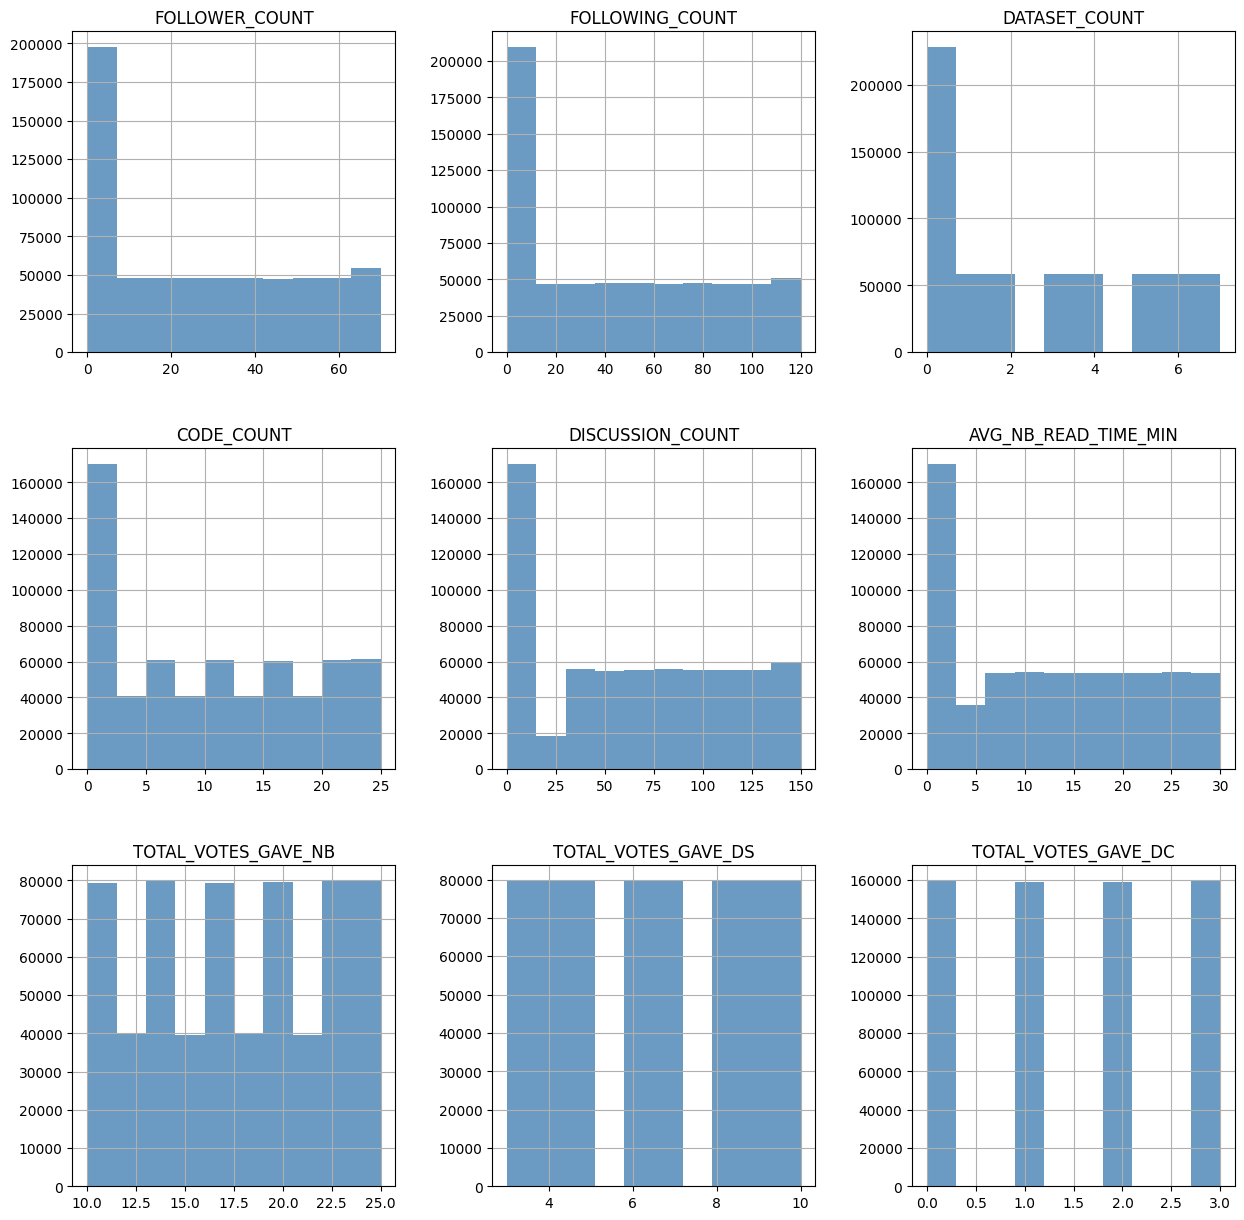

In [ ]:
# checking skewness 
numeric_df.hist(rwidth=None, log=False, figsize=(15,15), color='steelblue', alpha=0.8, label='Value', linewidth=2, stacked=False)
plt.show()

## Corelations between variables and ISBOT

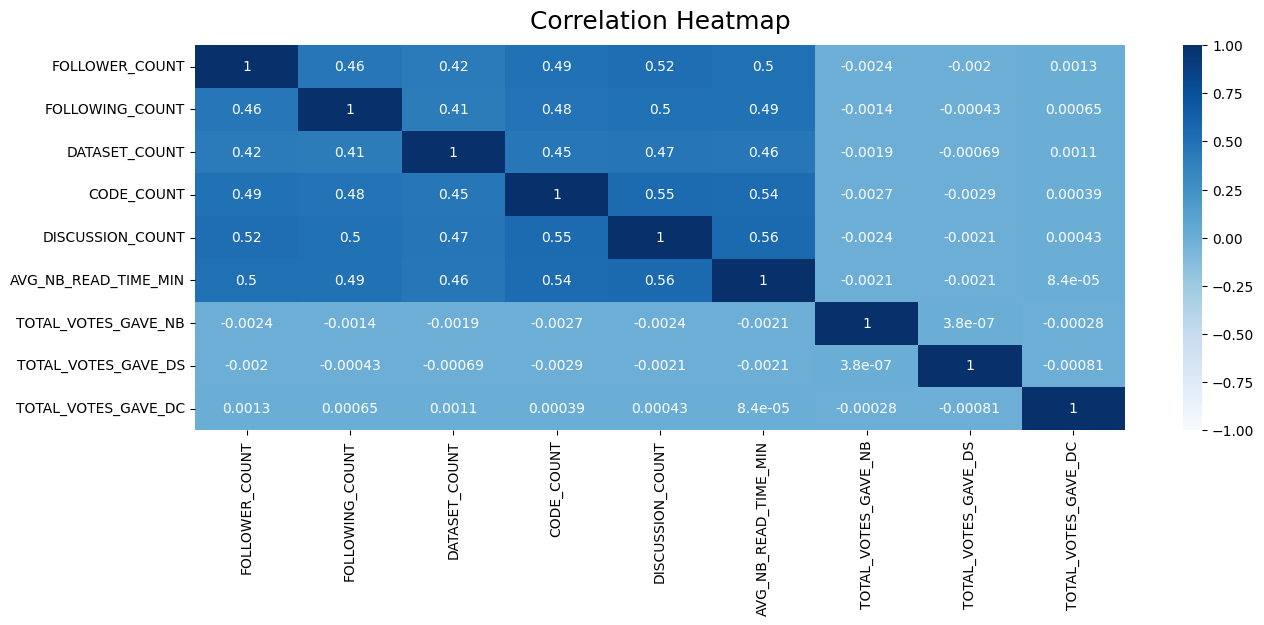

In [ ]:
# visualizing the correlation between different variables

plt.figure(figsize=(15, 5))
heatmap = sns.heatmap(numeric_df.corr(), vmin=-1, vmax=1, annot=True, cmap='Blues')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12);

In [ ]:
numeric_df.corr()

,FOLLOWER_COUNT,FOLLOWING_COUNT,DATASET_COUNT,CODE_COUNT,DISCUSSION_COUNT,AVG_NB_READ_TIME_MIN,TOTAL_VOTES_GAVE_NB,TOTAL_VOTES_GAVE_DS,TOTAL_VOTES_GAVE_DC
FOLLOWER_COUNT,1.000000,0.455792,0.423014,0.494732,0.515758,0.504755,-2.361433e-03,-2.004861e-03,0.001261
FOLLOWING_COUNT,0.455792,1.000000,0.414903,0.483820,0.503325,0.493075,-1.405586e-03,-4.307731e-04,0.000652
DATASET_COUNT,0.423014,0.414903,1.000000,0.449094,0.468069,0.458666,-1.934335e-03,-6.915442e-04,0.001149
CODE_COUNT,0.494732,0.483820,0.449094,1.000000,0.547087,0.535179,-2.664044e-03,-2.902528e-03,0.000386
DISCUSSION_COUNT,0.515758,0.503325,0.468069,0.547087,1.000000,0.558864,-2.386519e-03,-2.124370e-03,0.000431
AVG_NB_READ_TIME_MIN,0.504755,0.493075,0.458666,0.535179,0.558864,1.000000,-2.051720e-03,-2.073838e-03,0.000084
TOTAL_VOTES_GAVE_NB,-0.002361,-0.001406,-0.001934,-0.002664,-0.002387,-0.002052,1.000000e+00,3.780836e-07,-0.000281
TOTAL_VOTES_GAVE_DS,-0.002005,-0.000431,-0.000692,-0.002903,-0.002124,-0.002074,3.780836e-07,1.000000e+00,-0.000805
TOTAL_VOTES_GAVE_DC,0.001261,0.000652,0.001149,0.000386,0.000431,0.000084,-2.805626e-04,-8.054230e-04,1.000000


# 4. Data Manipulation - Features

## One-Hot Encoding

One of the major problems with machine learning is that a lot of algorithms cannot work directly with categorical data. We use One-Hot Encoding, that creates one column for every possible value and put a 1 in the appropriate column.

In [ ]:
from pyspark.ml.feature import StringIndexer

string_col= [column.name for column in acc_data.schema if column.dataType == StringType()]

for col in string_col:
  string_indexer = StringIndexer(inputCol= col, outputCol= col+"Index")
  acc_data = string_indexer.fit(acc_data).transform(acc_data)

acc_data = acc_data.drop('ISBOT','GENDER','IS_GLOGIN')
acc_data.show()

+--------------+---------------+-------------+----------+----------------+--------------------+-------------------+-------------------+-------------------+-----------+--------------+----------+
|FOLLOWER_COUNT|FOLLOWING_COUNT|DATASET_COUNT|CODE_COUNT|DISCUSSION_COUNT|AVG_NB_READ_TIME_MIN|TOTAL_VOTES_GAVE_NB|TOTAL_VOTES_GAVE_DS|TOTAL_VOTES_GAVE_DC|GENDERIndex|IS_GLOGINIndex|ISBOTIndex|
+--------------+---------------+-------------+----------+----------------+--------------------+-------------------+-------------------+-------------------+-----------+--------------+----------+
|          44.0|           81.0|          4.0|      17.0|           125.0|                7.75|               16.0|                4.0|                0.0|        0.0|           1.0|       0.0|
|          23.0|          114.0|          5.0|      24.0|            67.0|                13.4|               21.0|               10.0|                1.0|        0.0|           1.0|       0.0|
|          46.0|          112.

## Target Variable: ISBOTIndex 
- Binary Classification 0: False, 1: True

## Feature Scaling

Feature scaling is the process of normalizing the range of features in a dataset. Our datase has features that are varying in degrees of magnitude and range. Therefore, in order for machine learning models to perfom well it is important to scale the features before creating a machine learning model.

In [ ]:
from pyspark.ml.feature import MinMaxScaler
from pyspark.ml import Pipeline
from pyspark.ml.linalg import Vectors
from pyspark.ml.feature import VectorAssembler


assemblers = [VectorAssembler(inputCols=[col], outputCol=col + "_vec") for col in acc_data.columns]
scalers = [MinMaxScaler(inputCol=col + "_vec", outputCol=col + "_scaled") for col in acc_data.columns]
pipeline = Pipeline(stages=assemblers + scalers)
scalerModel = pipeline.fit(acc_data)
acc_data = scalerModel.transform(acc_data)

acc_data.show()


+--------------+---------------+-------------+----------+----------------+--------------------+-------------------+-------------------+-------------------+-----------+--------------+----------+------------------+-------------------+-----------------+--------------+--------------------+------------------------+-----------------------+-----------------------+-----------------------+---------------+------------------+--------------+---------------------+----------------------+--------------------+-----------------+-----------------------+---------------------------+--------------------------+--------------------------+--------------------------+------------------+---------------------+-----------------+
|FOLLOWER_COUNT|FOLLOWING_COUNT|DATASET_COUNT|CODE_COUNT|DISCUSSION_COUNT|AVG_NB_READ_TIME_MIN|TOTAL_VOTES_GAVE_NB|TOTAL_VOTES_GAVE_DS|TOTAL_VOTES_GAVE_DC|GENDERIndex|IS_GLOGINIndex|ISBOTIndex|FOLLOWER_COUNT_vec|FOLLOWING_COUNT_vec|DATASET_COUNT_vec|CODE_COUNT_vec|DISCUSSION_COUNT_vec|AVG_

In [ ]:
db_col= [column.name for column in acc_data.schema if column.dataType == DoubleType()]

for col in db_col:
  acc_data = acc_data.drop(col)
acc_data = acc_data.drop('FOLLOWER_COUNT_vec','FOLLOWING_COUNT_vec','DATASET_COUNT_vec',
              'DISCUSSION_COUNT_vec','AVG_NB_READ_TIME_MIN_vec','TOTAL_VOTES_GAVE_NB_vec',
              'TOTAL_VOTES_GAVE_DS_vec','ISBOTIndex_vec','GENDERIndex_vec',
              'IS_GLOGINIndex_vec','CODE_COUNT_vec','TOTAL_VOTES_GAVE_DC_vec')
acc_data.show()

+---------------------+----------------------+--------------------+-----------------+-----------------------+---------------------------+--------------------------+--------------------------+--------------------------+------------------+---------------------+-----------------+
|FOLLOWER_COUNT_scaled|FOLLOWING_COUNT_scaled|DATASET_COUNT_scaled|CODE_COUNT_scaled|DISCUSSION_COUNT_scaled|AVG_NB_READ_TIME_MIN_scaled|TOTAL_VOTES_GAVE_NB_scaled|TOTAL_VOTES_GAVE_DS_scaled|TOTAL_VOTES_GAVE_DC_scaled|GENDERIndex_scaled|IS_GLOGINIndex_scaled|ISBOTIndex_scaled|
+---------------------+----------------------+--------------------+-----------------+-----------------------+---------------------------+--------------------------+--------------------------+--------------------------+------------------+---------------------+-----------------+
| [0.6285714285714286]|               [0.675]|[0.5714285714285714]|           [0.68]|   [0.8333333333333334]|       [0.25841947315771...|                     [0.4]|  

In [ ]:
from pyspark.sql.functions import udf

unlist = udf(lambda x: float(list(x)[0]), DoubleType())

for col in acc_data.columns:
  acc_data = acc_data.withColumn(col, unlist(col))
acc_data.show()


+---------------------+----------------------+--------------------+-----------------+-----------------------+---------------------------+--------------------------+--------------------------+--------------------------+------------------+---------------------+-----------------+
|FOLLOWER_COUNT_scaled|FOLLOWING_COUNT_scaled|DATASET_COUNT_scaled|CODE_COUNT_scaled|DISCUSSION_COUNT_scaled|AVG_NB_READ_TIME_MIN_scaled|TOTAL_VOTES_GAVE_NB_scaled|TOTAL_VOTES_GAVE_DS_scaled|TOTAL_VOTES_GAVE_DC_scaled|GENDERIndex_scaled|IS_GLOGINIndex_scaled|ISBOTIndex_scaled|
+---------------------+----------------------+--------------------+-----------------+-----------------------+---------------------------+--------------------------+--------------------------+--------------------------+------------------+---------------------+-----------------+
|   0.6285714285714286|                 0.675|  0.5714285714285714|             0.68|     0.8333333333333334|        0.25841947315771924|                       0.4|  

Convert features into one vector

In [ ]:
assembler = VectorAssembler(
    inputCols=['FOLLOWER_COUNT_scaled','FOLLOWING_COUNT_scaled','DATASET_COUNT_scaled',
              'DISCUSSION_COUNT_scaled','AVG_NB_READ_TIME_MIN_scaled','TOTAL_VOTES_GAVE_NB_scaled',
              'TOTAL_VOTES_GAVE_DS_scaled','GENDERIndex_scaled',
              'IS_GLOGINIndex_scaled','CODE_COUNT_scaled','TOTAL_VOTES_GAVE_DC_scaled'],
    outputCol="features")

In [ ]:
acc_scaled = assembler.transform(acc_data)
acc_scaled = acc_scaled.select("features", "ISBOTIndex_scaled")
acc_scaled.show()

+--------------------+-----------------+
|            features|ISBOTIndex_scaled|
+--------------------+-----------------+
|[0.62857142857142...|              0.0|
|[0.32857142857142...|              0.0|
|[0.65714285714285...|              0.0|
|(11,[0,1,4,5,6,10...|              1.0|
|[0.02857142857142...|              1.0|
|[0.92857142857142...|              0.0|
|[1.0,0.1166666666...|              0.0|
|[0.71428571428571...|              0.0|
|(11,[1,3,4,5,6,10...|              1.0|
|[0.78571428571428...|              0.0|
|[1.0,0.4583333333...|              0.0|
|[0.0,0.025,0.0,0....|              1.0|
|[0.04285714285714...|              0.0|
|(11,[0,3,4,5,6,9]...|              1.0|
|[0.81428571428571...|              0.0|
|[0.02857142857142...|              1.0|
|[0.92857142857142...|              0.0|
|[0.41428571428571...|              0.0|
|(11,[1,4,5,6,10],...|              1.0|
|[0.12857142857142...|              0.0|
+--------------------+-----------------+
only showing top

## Imbalanced data: Undersampling

In [ ]:
# Import the necessary modules
from pyspark.sql.functions import rand

# Count the number of instances in each class
class_counts = acc_scaled.groupBy('ISBOTIndex_scaled').count().orderBy('ISBOTIndex_scaled')

# Compute the ratio of the minority class to the majority class
minority_class_ratio = class_counts.selectExpr('min(count) / max(count) as ratio').first().ratio

# Undersample the majority class to balance the class distribution
acc_scaled_majority = acc_scaled.filter(acc_scaled.ISBOTIndex_scaled == 0)
acc_scaled_minority = acc_scaled.filter(acc_scaled.ISBOTIndex_scaled == 1)
acc_scaled_majority_undersampled = acc_scaled_majority.sample(False, minority_class_ratio, seed=42).orderBy(rand())

# Combine the minority class instances with the undersampled majority class instances
acc_scaled_balanced = acc_scaled_minority.union(acc_scaled_majority_undersampled)

In [ ]:
bot_acc = acc_scaled_balanced.groupBy("ISBOTIndex_scaled").count()
bot_null = bot_acc.withColumn('percent', f.col('count')/f.sum('count').over(Window.partitionBy()))
bot_null.orderBy('percent', ascending=False).show()

+-----------------+------+------------------+
|ISBOTIndex_scaled| count|           percent|
+-----------------+------+------------------+
|              1.0|170372|0.5000293492680292|
|              0.0|170352|0.4999706507319707|
+-----------------+------+------------------+



In [ ]:
isbot_df = bot_null.toPandas()

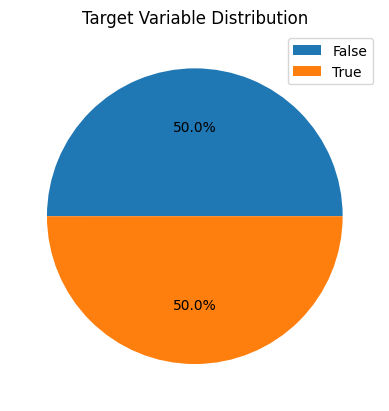

In [ ]:
# Visualizing the target label distribution using a pie chart

labels = ['False','True']
plt.title("Target Variable Distribution")
plt.pie(isbot_df['percent'], autopct='%1.1f%%')
plt.legend(labels, loc="upper right")
plt.show()

# 5. Model training and evaluation

## Preparing Training and Test Data

In [ ]:
# Split the data into training and testing sets
train, test = acc_scaled_balanced.randomSplit([0.75, 0.25], seed=42)
print("Training Dataset Count: " + str(train.count()))
print("Test Dataset Count: " + str(test.count()))

Training Dataset Count: 255679
Test Dataset Count: 85057


In [ ]:
from pyspark.ml.evaluation import MulticlassClassificationEvaluator
import numpy as np
from pyspark.ml.classification import RandomForestClassifier

# Create a Random Forest classifier
rf = RandomForestClassifier(featuresCol='features', labelCol='ISBOTIndex_scaled', seed=42)

model = rf.fit(train)
rf_predictions = model.transform(test)

# Select the true and predicted labels from the RF predictions
y_true = rf_predictions.select('ISBOTIndex_scaled').rdd.flatMap(lambda x: x).collect()
y_pred = rf_predictions.select('prediction').rdd.flatMap(lambda x: x).collect()

# Compute the confusion matrix
conf_matrix = np.zeros((2, 2))
for i in range(len(y_true)):
    conf_matrix[int(y_true[i])][int(y_pred[i])] += 1

# Compute the accuracy
accuracy = sum([conf_matrix[i][i] for i in range(2)]) / len(y_true)

# Print the confusion matrix and accuracy
print('Confusion Matrix:')
print(conf_matrix)
print('Accuracy:', accuracy)

Confusion Matrix:
[[42477.     0.]
 [    0. 42562.]]
Accuracy: 1.0


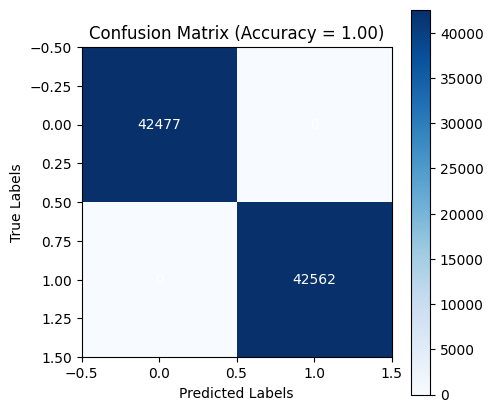

In [ ]:
import matplotlib.pyplot as plt

# Plot the confusion matrix
fig, ax = plt.subplots(figsize=(5, 5))
ax.imshow(conf_matrix, cmap='Blues')

# Add labels and title
ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels')
ax.set_title('Confusion Matrix (Accuracy = {:.2f})'.format(accuracy))

# Add the colorbar
axcolor = ax.imshow(conf_matrix, cmap='Blues')
cbar = fig.colorbar(axcolor, ax=ax)

# Add the counts to the plot
for i in range(2):
    for j in range(2):
        ax.text(j, i, int(conf_matrix[i][j]), ha='center', va='center', color='white')

# Show the plot
plt.show()

In [ ]:
from pyspark.ml.classification import LinearSVC


# Create a LinearSVC classifier
svm = LinearSVC(featuresCol='features', labelCol='ISBOTIndex_scaled', maxIter=10, regParam=0.1)

# Train the model using the training set
svm_model = svm.fit(train)

# Make predictions on the test set
svm_predictions = svm_model.transform(test)
# Select the true and predicted labels from the SVM predictions
y_true = svm_predictions.select('ISBOTIndex_scaled').rdd.flatMap(lambda x: x).collect()
y_pred = svm_predictions.select('prediction').rdd.flatMap(lambda x: x).collect()

# Compute the confusion matrix
conf_matrix = np.zeros((2, 2))
for i in range(len(y_true)):
    conf_matrix[int(y_true[i])][int(y_pred[i])] += 1

# Compute the accuracy
accuracy = sum([conf_matrix[i][i] for i in range(2)]) / len(y_true)

# Print the confusion matrix and accuracy
print('Confusion Matrix:')
print(conf_matrix)
print('Accuracy:', accuracy)

Confusion Matrix:
[[4.2453e+04 2.6000e+01]
 [0.0000e+00 4.2562e+04]]
Accuracy: 0.9996942651191778


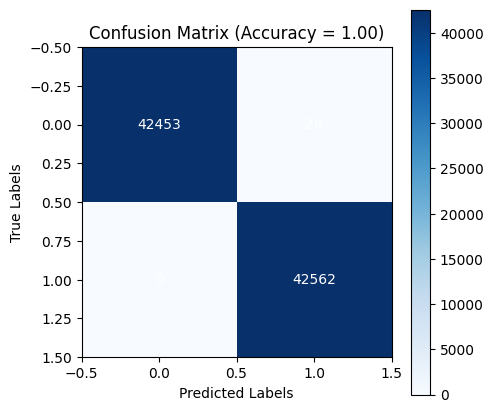

In [ ]:
import matplotlib.pyplot as plt

# Plot the confusion matrix
fig, ax = plt.subplots(figsize=(5, 5))
ax.imshow(conf_matrix, cmap='Blues')

# Add labels and title
ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels')
ax.set_title('Confusion Matrix (Accuracy = {:.2f})'.format(accuracy))

# Add the colorbar
axcolor = ax.imshow(conf_matrix, cmap='Blues')
cbar = fig.colorbar(axcolor, ax=ax)

# Add the counts to the plot
for i in range(2):
    for j in range(2):
        ax.text(j, i, int(conf_matrix[i][j]), ha='center', va='center', color='white')

# Show the plot
plt.show()

In [ ]:
from pyspark.ml.classification import LogisticRegression


# Create a Logistic Regression classifier
lr = LogisticRegression(featuresCol='features', labelCol='ISBOTIndex_scaled', maxIter=10, regParam=0.3, elasticNetParam=0.8)

# Train the model
lr_model = lr.fit(train)

# Make predictions on test data
lr_predictions = lr_model.transform(test)

# Select the true and predicted labels from the LR predictions
y_true = lr_predictions.select('ISBOTIndex_scaled').rdd.flatMap(lambda x: x).collect()
y_pred = lr_predictions.select('prediction').rdd.flatMap(lambda x: x).collect()

# Compute the confusion matrix
conf_matrix = np.zeros((2, 2))
for i in range(len(y_true)):
    conf_matrix[int(y_true[i])][int(y_pred[i])] += 1

# Compute the accuracy
accuracy = sum([conf_matrix[i][i] for i in range(2)]) / len(y_true)

# Print the confusion matrix and accuracy
print('Confusion Matrix:')
print(conf_matrix)
print('Accuracy:', accuracy)

Confusion Matrix:
[[42007.   482.]
 [    0. 42562.]]
Accuracy: 0.9943328120774594


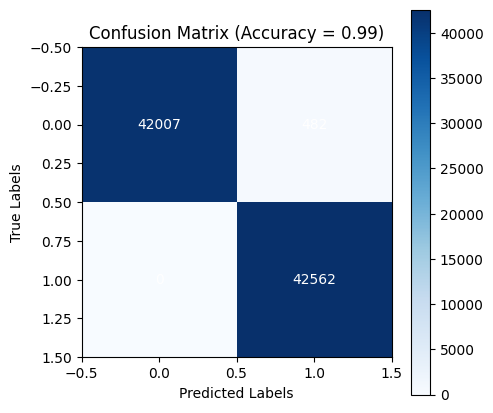

In [ ]:
import matplotlib.pyplot as plt

# Plot the confusion matrix
fig, ax = plt.subplots(figsize=(5, 5))
ax.imshow(conf_matrix, cmap='Blues')

# Add labels and title
ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels')
ax.set_title('Confusion Matrix (Accuracy = {:.2f})'.format(accuracy))

# Add the colorbar
axcolor = ax.imshow(conf_matrix, cmap='Blues')
cbar = fig.colorbar(axcolor, ax=ax)

# Add the counts to the plot
for i in range(2):
    for j in range(2):
        ax.text(j, i, int(conf_matrix[i][j]), ha='center', va='center', color='white')

# Show the plot
plt.show()